# Aggregieren der Daten
In diesem Notebook werden die zuvor erstellten Datenquellen eingelesen und  zudem werden die Quelldaten mit zusätzlichen Daten angereichert um das Dataset zu vervollständigen und zur visualisierung bereitzustellen <br>
* **Sonnenscheindauer:** Einige Kantone fehlen daher muss die Sonnenscheindauer   zusätzlich über eine API abgerufen werden.
* **Mietpreise:** Es gibt verschiedene Wohnungsgrössen. Es muss sichergestellt sein, dass die Wohnungsgrössen einfach mit den entsprechenden Strompreisen vergleichbar sind. <br>
* **Strompreise:** Es gibt standard und reduzierte Strompreise. Es muss sichergestellt sein, dass auf eine passende grösse festgelegt wird, oder die unterschiedlichen Preis zumindest einfach zugägnlich für Vergleiche sind.<br>


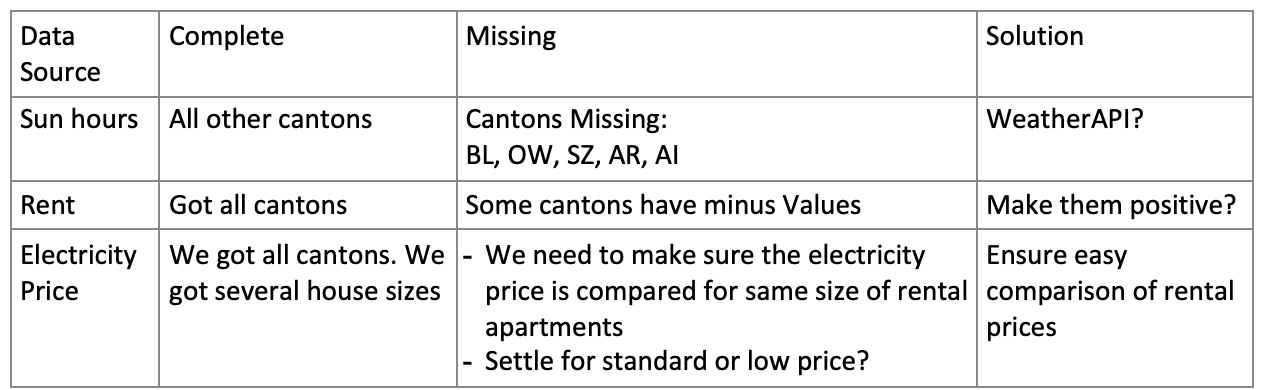




## Verwendete Links/Quellen

# Installation notwendiger Bibliotheken

In [29]:
!pip install --upgrade pip
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install beautifulsoup4
!pip install openpyxl


# Module importieren

In [30]:
import requests
import pandas as pd
import numpy as np
from pathlib import Path
from google.colab import drive # Library to access shared folder "ie_scripting_datasets" on google drive
import os
from bs4 import BeautifulSoup
import urllib.request
import openpyxl


# Speicher Ort für Datenquellen

In [14]:
drive.mount('/content/drive') #will give access to "ie_scripting_datasets" on google drive in folder selection


Mounted at /content/drive


# Funktionen

In [83]:
def create_df_sonnenscheindauer_all_years():

  # Specify the path to your Excel file
  excel_file = '/content/drive/MyDrive/ie_scripting_datasets/Sonnenscheindauer.xlsx'

  # Read all sheets in the Excel file
  dfs = pd.read_excel(excel_file, sheet_name=None)

  # `dfs` is a dictionary where keys are sheet names and values are DataFrames

  # Initialize an empty list to store DataFrames
  df_list = []

  # Iterate through the dictionary items
  for sheet_name, df in dfs.items():
      # Optionally add a column to indicate the sheet name (e.g., the year)
      df['Year'] = sheet_name

      # Append the DataFrame to the list
      df_list.append(df)

  # Concatenate all DataFrames into a single DataFrame
  sonnenscheindauer_all_years_df = pd.concat(df_list, ignore_index=True)

  # Return the combined DataFrame
  return sonnenscheindauer_all_years_df
# Print the combined DataFrame
print(sonnenscheindauer_all_years_df)


               Station  Jan  Feb  Mär  Apr  Mai  Jun  Jul  Aug  Sep  Okt  Nov  \
0            Adelboden   75   97   84  112   99  116  185  213  106   81  NaN   
1                Aigle   73  102  111  125  118  150  244  256  129  112  NaN   
2              Altdorf   46   73   95  115  103  123  173  190  120   56  NaN   
3      Basel-Binningen   63   56  110  121  153  153  225  285  128   82  NaN   
4    Bern / Zollikofen   61   90  108  143  151  160  239  273  131   78  NaN   
..                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
695      Weissfluhjoch  156  162  227  239  233  124  125  251  212  226  205   
696              Wynau   54  104  180  272  286  175  233  255  195  116   35   
697            Zermatt  116  121  159  199  195  134  161  197  185  165  122   
698    Zürich / Kloten   39   92  183  273  288  171  218  265  185  112   53   
699  Zürich / Fluntern   53  104  178  280  280  158  193  259  204  126   79   

      Dez Total  Year  
0  

In [84]:
sonnenscheindauer_all_years_df = create_df_sonnenscheindauer_all_years()
print(sonnenscheindauer_all_years_df)

               Station  Jan  Feb  Mär  Apr  Mai  Jun  Jul  Aug  Sep  Okt  Nov  \
0            Adelboden   75   97   84  112   99  116  185  213  106   81  NaN   
1                Aigle   73  102  111  125  118  150  244  256  129  112  NaN   
2              Altdorf   46   73   95  115  103  123  173  190  120   56  NaN   
3      Basel-Binningen   63   56  110  121  153  153  225  285  128   82  NaN   
4    Bern / Zollikofen   61   90  108  143  151  160  239  273  131   78  NaN   
..                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
695      Weissfluhjoch  156  162  227  239  233  124  125  251  212  226  205   
696              Wynau   54  104  180  272  286  175  233  255  195  116   35   
697            Zermatt  116  121  159  199  195  134  161  197  185  165  122   
698    Zürich / Kloten   39   92  183  273  288  171  218  265  185  112   53   
699  Zürich / Fluntern   53  104  178  280  280  158  193  259  204  126   79   

      Dez Total  Year  
0  

In [90]:
def get_unique_stations(df):
  """
  Extracts unique values from the first column of a Pandas DataFrame and returns them as a set.

  Args:
    df: The Pandas DataFrame.

  Returns:
    A set containing the unique values from the first column.
  """

  # Get the first column (index 0) as a Series
  all_stations = sonnenscheindauer_all_years_df.iloc[:, 0]

  # Convert the Series to a set to get unique values
  stations = set(all_stations)

  return stations

# Assuming you have already loaded your data into 'df_sonnenscheindauer_all_years'
# and called df_sonnenscheindauer_all_years() like in the previous solution:
# sonnenscheindauer_all_years_df = df_sonnenscheindauer_all_years()

# Now get the unique values from the second column:
stations = get_unique_stations(sonnenscheindauer_all_years_df)

# Print the set
print(stations)

{'Buchs-Aarau', 'Altdorf', 'St. Gallen', 'Säntis', 'Vaduz', 'Pully', 'Basel-Binningen', 'Schaffhausen', 'Davos', 'Col du Gd-St-Bernard', 'Neuchâtel', 'Wädenswil', 'Payerne', 'Napf', 'Scuol', 'Adelboden', 'Zürich / Kloten', 'Fahy', 'Luzern', 'Aadorf / Tänikon', 'Le Moléson', 'San Bernardino', 'Glarus', 'Poschiavo / Robbia', 'Güttingen', 'Pilatus', 'Jungfraujoch Sphinx', 'La Dôle', 'Wynau', 'Engelberg', 'Disentis / Sedrun', 'Cimetta', 'Weissfluhjoch', 'Genève-Cointrin', 'Zürich / Fluntern', 'Stabio', 'Interlaken', 'La Chaux-de-Fonds', 'Gütsch ob Andermatt', 'Montana', 'Zermatt', 'Bern / Zollikofen', 'Rünenberg', 'Sion', 'Visp', 'Locarno / Monti', 'Lugano', 'Aigle', 'Samedan-Flugplatz', 'Chur'}


#Erstellen einer Liste aller Stationen

In [91]:
#saving the stations in a variable

stations = get_unique_stations(sonnenscheindauer_all_years_df)
#print(stations)

#Import einer Liste mit allen Gemeindenamen und Kantonszugehörigkeit


In [88]:
"""
# import aller gemeinden und Erstellung Dataframe um Gemeinden an Kantone zuweisen zu können
file_url = 'https://www.agvchapp.bfs.admin.ch/de#:~:text=Gemeinde%20abgefragt%20werden.-,Gemeindestand,-XLSX%2001.01.2024'

# Load the Excel file from the URL into a DataFrame
df_gemeinden = pd.read_excel(file_url)

# Display the first few rows of the DataFrame
df_gemeinden.head()

print(df_gemeinden)

"""
import requests
import pandas as pd
import warnings
def get_all_municipalities():
  # Suppress the specific warning about the default style in openpyxl
  warnings.simplefilter("ignore", UserWarning)

  # Define the URL for the POST request (replace with the exact form action URL)
  url = "https://www.agvchapp.bfs.admin.ch/de/state/results/xls?SnapshotDate=01.01.2024"

  # Send the POST request to download the file containing all swiss municipalities
  response = requests.post(url)

  # Check if the request was successful
  if response.status_code == 200:
      # Save the content as an Excel file locally
      with open("gemeinden.xlsx", "wb") as file:
          file.write(response.content)

      # Load the downloaded Excel file into a DataFrame
      try:
          df_gemeinden = pd.read_excel("gemeinden.xlsx", engine='openpyxl')
          # Display the first few rows of the DataFrame
          display(df_gemeinden.head())
      except Exception as e:
          print("An error occurred while reading the Excel file:", e)
  else:
      print("Failed to download the file. Status code:", response.status_code)

  return df_gemeinden





In [92]:
#Definieren aller gemeinden in einem Dataframe
gemeinden = get_all_municipalities()

,Hist.-Nummer,Kanton,Bezirks-nummer,Bezirksname,BFS Gde-nummer,Gemeindename,Datum der Aufnahme
0,13256,ZH,101,Affoltern,1,Aeugst am Albis,1976-11-15
1,11742,ZH,101,Affoltern,2,Affoltern am Albis,1848-09-12
2,11801,ZH,101,Affoltern,3,Bonstetten,1848-09-12
3,11992,ZH,101,Affoltern,4,Hausen am Albis,1911-01-01
4,12249,ZH,101,Affoltern,5,Hedingen,1848-09-12


In [98]:
#Erstellen eines sets aller Kantone
all_cantons = set(gemeinden.iloc[:, 1])
len(all_cantons)



26

In [99]:
#Erstellen der Listen aller Stationen und Kantone

stations_list = list(stations)
cantons_list = list(all_cantons)

print(stations_list)
print(cantons_list)

['Buchs-Aarau', 'Altdorf', 'St. Gallen', 'Säntis', 'Vaduz', 'Pully', 'Basel-Binningen', 'Schaffhausen', 'Davos', 'Col du Gd-St-Bernard', 'Neuchâtel', 'Wädenswil', 'Payerne', 'Napf', 'Scuol', 'Adelboden', 'Zürich / Kloten', 'Fahy', 'Luzern', 'Aadorf / Tänikon', 'Le Moléson', 'San Bernardino', 'Glarus', 'Poschiavo / Robbia', 'Güttingen', 'Pilatus', 'Jungfraujoch Sphinx', 'La Dôle', 'Wynau', 'Engelberg', 'Disentis / Sedrun', 'Cimetta', 'Weissfluhjoch', 'Genève-Cointrin', 'Zürich / Fluntern', 'Stabio', 'Interlaken', 'La Chaux-de-Fonds', 'Gütsch ob Andermatt', 'Montana', 'Zermatt', 'Bern / Zollikofen', 'Rünenberg', 'Sion', 'Visp', 'Locarno / Monti', 'Lugano', 'Aigle', 'Samedan-Flugplatz', 'Chur']
['GE', 'AI', 'TG', 'VS', 'SZ', 'GR', 'UR', 'BS', 'AG', 'ZH', 'OW', 'NW', 'ZG', 'JU', 'TI', 'LU', 'AR', 'VD', 'GL', 'BL', 'BE', 'SG', 'FR', 'NE', 'SO', 'SH']


In [104]:


def get_station_canton_mapping(stations_list, gemeinden):
  """
  Compares a list of stations against a municipality DataFrame and returns a dictionary
  mapping station names to their cantons.

  Args:
    stations_list: A list of station names.
    gemeinden: A Pandas DataFrame containing municipality information,
              including columns for municipality name ('Gemeindename') and canton ('Kanton').

  Returns:
    A dictionary where keys are station names and values are their corresponding cantons.
  """

  station_canton_map = {}  # Initialize an empty dictionary

  for station in stations_list:
    # Find the row in 'gemeinden' where 'Gemeindename' matches the station
    matching_row = gemeinden[gemeinden['Gemeindename'] == station]

    # If a match is found, extract the canton and add to the dictionary
    if not matching_row.empty:
      canton = matching_row['Kanton'].iloc[0]  # Get canton from the first matching row
      station_canton_map[station] = canton
    else:
      """
      If no match is found, add with value "not found" / Kann auskommentiert werden um
      um nur diejenigen stationen zu zeigen die effektif einem Kanton zugeordnet werden könnnen
      """
      station_canton_map[station] = "not found"


  return station_canton_map



In [105]:
# Erstellung des Dictionary für das Stations/Kantons Mapping
station_canton_dict = get_station_canton_mapping(stations_list, gemeinden)
print(station_canton_dict)
len(station_canton_dict)

{'Buchs-Aarau': 'not found', 'Altdorf': 'not found', 'St. Gallen': 'SG', 'Säntis': 'not found', 'Vaduz': 'not found', 'Pully': 'VD', 'Basel-Binningen': 'not found', 'Schaffhausen': 'SH', 'Davos': 'GR', 'Col du Gd-St-Bernard': 'not found', 'Neuchâtel': 'NE', 'Wädenswil': 'ZH', 'Payerne': 'VD', 'Napf': 'not found', 'Scuol': 'GR', 'Adelboden': 'BE', 'Zürich / Kloten': 'not found', 'Fahy': 'JU', 'Luzern': 'LU', 'Aadorf / Tänikon': 'not found', 'Le Moléson': 'not found', 'San Bernardino': 'not found', 'Glarus': 'GL', 'Poschiavo / Robbia': 'not found', 'Güttingen': 'TG', 'Pilatus': 'not found', 'Jungfraujoch Sphinx': 'not found', 'La Dôle': 'not found', 'Wynau': 'BE', 'Engelberg': 'OW', 'Disentis / Sedrun': 'not found', 'Cimetta': 'not found', 'Weissfluhjoch': 'not found', 'Genève-Cointrin': 'not found', 'Zürich / Fluntern': 'not found', 'Stabio': 'TI', 'Interlaken': 'BE', 'La Chaux-de-Fonds': 'NE', 'Gütsch ob Andermatt': 'not found', 'Montana': 'not found', 'Zermatt': 'VS', 'Bern / Zollikof

50

In [106]:
station_cantons = []  # Initialize an empty list

for canton in station_canton_dict.values():  # Iterate through the values (cantons)
  station_cantons.append(canton)  # Add each canton to the list

print(station_cantons)  # Print the list of cantons

['not found', 'not found', 'SG', 'not found', 'not found', 'VD', 'not found', 'SH', 'GR', 'not found', 'NE', 'ZH', 'VD', 'not found', 'GR', 'BE', 'not found', 'JU', 'LU', 'not found', 'not found', 'not found', 'GL', 'not found', 'TG', 'not found', 'not found', 'not found', 'BE', 'OW', 'not found', 'not found', 'not found', 'not found', 'not found', 'TI', 'BE', 'NE', 'not found', 'not found', 'VS', 'not found', 'BL', 'VS', 'VS', 'not found', 'TI', 'VD', 'not found', 'GR']


In [108]:
#Stations Missing or not found in following Cantons:

missing_cantons = []  # Initialize an empty list

for canton in cantons_list:
  if canton not in station_cantons:
    missing_cantons.append(canton)

print(missing_cantons)  # Print the list of missing cantons


['GE', 'AI', 'SZ', 'UR', 'BS', 'AG', 'NW', 'ZG', 'AR', 'FR', 'SO']
